## Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants :

* To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

* To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

* To know the accracy of the model, i.e. how well these variables can predict house prices.


## Importing all the Libraries 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Load data

Importing the data set and creating it's dataframe named as housing

In [2]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))

In [3]:
# Checking the head of the dataset to get some insight
housing.head().T # transposing it to view all the columns in vertically for ease of view.

,0,1,2,3,4
price,13300000,12250000,12250000,12215000,11410000
area,7420,8960,9960,7500,7420
bedrooms,4,4,3,4,4
bathrooms,2,4,2,2,1
stories,3,4,2,2,2
mainroad,yes,yes,yes,yes,yes
guestroom,no,no,no,no,yes
basement,no,no,yes,yes,yes
hotwaterheating,no,no,no,no,no
airconditioning,yes,yes,no,yes,yes


## Data Inspection

Now  our main focus is to inspect the data and understand it to some extent, see if there are missing values and non-numerical values.

In [4]:
housing.shape

(545, 13)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


> Checking for null values and represent them as their precentage of the missing values to the total values

In [7]:
housing.isnull().sum()*100/len(housing)

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [8]:
# There are no missing values as we can clearly see.

### Now analysing the data visually.

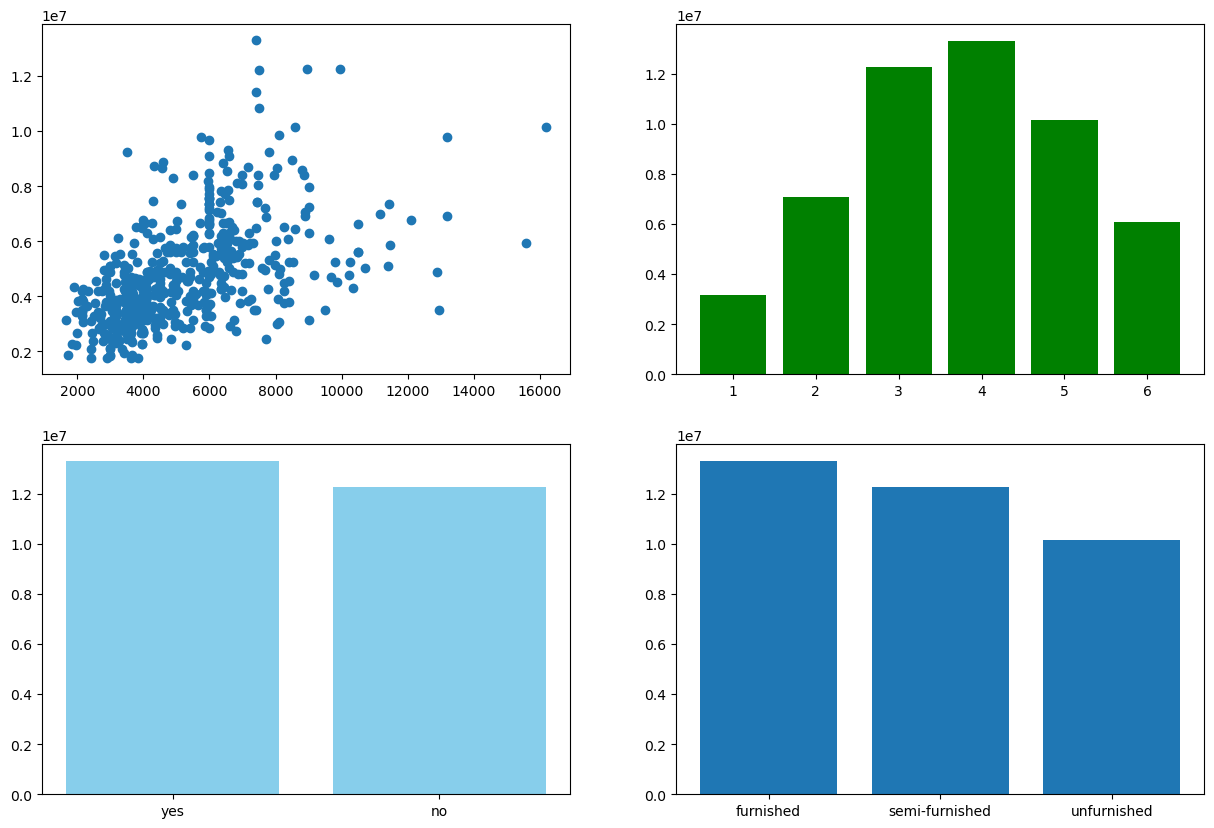

In [9]:
fig, axs = plt.subplots(2,2, figsize = (15,10))
plt.subplot(2,2,1)
plt_1 = plt.scatter(housing.area, housing["price"])

plt.subplot(2,2,2)
plt_2 = plt.bar(housing.bedrooms, housing.price, color = "green")

plt.subplot(2,2,3)
plt_3 = plt.bar(housing.airconditioning, housing.price, color = "skyblue")

plt.subplot(2,2,4)
plt_4 = plt.bar(housing.furnishingstatus, housing.price)

<Axes: xlabel='prefarea', ylabel='price'>

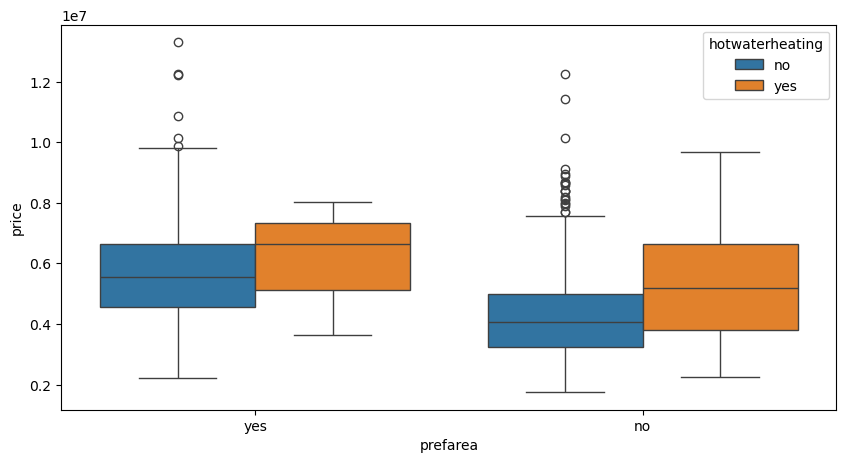

In [10]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = "prefarea", y = "price", hue = "hotwaterheating", data = housing)

### Data preprocessing


* As data have many categorical values so we now have to convert it to the numerical format.

* Because our machine learning model connot process with the strings so we'll have to give them numeric value.

In [11]:
for col in housing.select_dtypes(include='object').columns:
    housing[col] = housing[col].astype('category')
    
# This will turn all the object/string into the category

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


In [13]:
# Turn categorical variables into numbers
for label, content in housing.items():
    if not pd.api.types.is_numeric_dtype(content):
        # We add the +1 because pandas encodes missing categories as -1
        housing[label] = pd.Categorical(content).codes+1

In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int8 
 6   guestroom         545 non-null    int8 
 7   basement          545 non-null    int8 
 8   hotwaterheating   545 non-null    int8 
 9   airconditioning   545 non-null    int8 
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int8 
 12  furnishingstatus  545 non-null    int8 
dtypes: int64(6), int8(7)
memory usage: 29.4 KB


In [15]:
housing.head().T

,0,1,2,3,4
price,13300000,12250000,12250000,12215000,11410000
area,7420,8960,9960,7500,7420
bedrooms,4,4,3,4,4
bathrooms,2,4,2,2,1
stories,3,4,2,2,2
mainroad,2,2,2,2,2
guestroom,1,1,1,1,2
basement,1,1,2,2,2
hotwaterheating,1,1,1,1,1
airconditioning,2,2,1,2,2


In [16]:
housing.furnishingstatus.value_counts()

furnishingstatus
2    227
3    178
1    140
Name: count, dtype: int64

## Splitting the Data into Training and Testing Sets

In [17]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
train_set, test_set = train_test_split(housing,
                                       train_size=0.8,
                                       test_size= 0.2,
                                       random_state= 100)

### Rescaling the Features

As we can see the area section contain very high values as compared to the other features. As of result it can interfere with the our model's prediction as the model's prediction is more baised on the feature having high values explicitly.

So we'll have to rescale the values in order to attain better prediction and have comparable scales, if not then some of the coefficients as obtained by fitting th regression model might be very large or very small as compared to the other coefficients. This might be very annoying at the time of model evaluation.

There are actually three methods to obtain the rescaling of the data.

1. Min-Max Scaling
2. Standardisation
3. Normalization

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [24]:
# taking on the non categorical values
scaler_var_list = []
for column in housing.columns:
    if housing[column].dtype == "int64":
        scaler_var_list.append(column)

print(scaler_var_list)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [25]:
train_set[scaler_var_list] = scaler.fit_transform(train_set[scaler_var_list])

<Axes: >

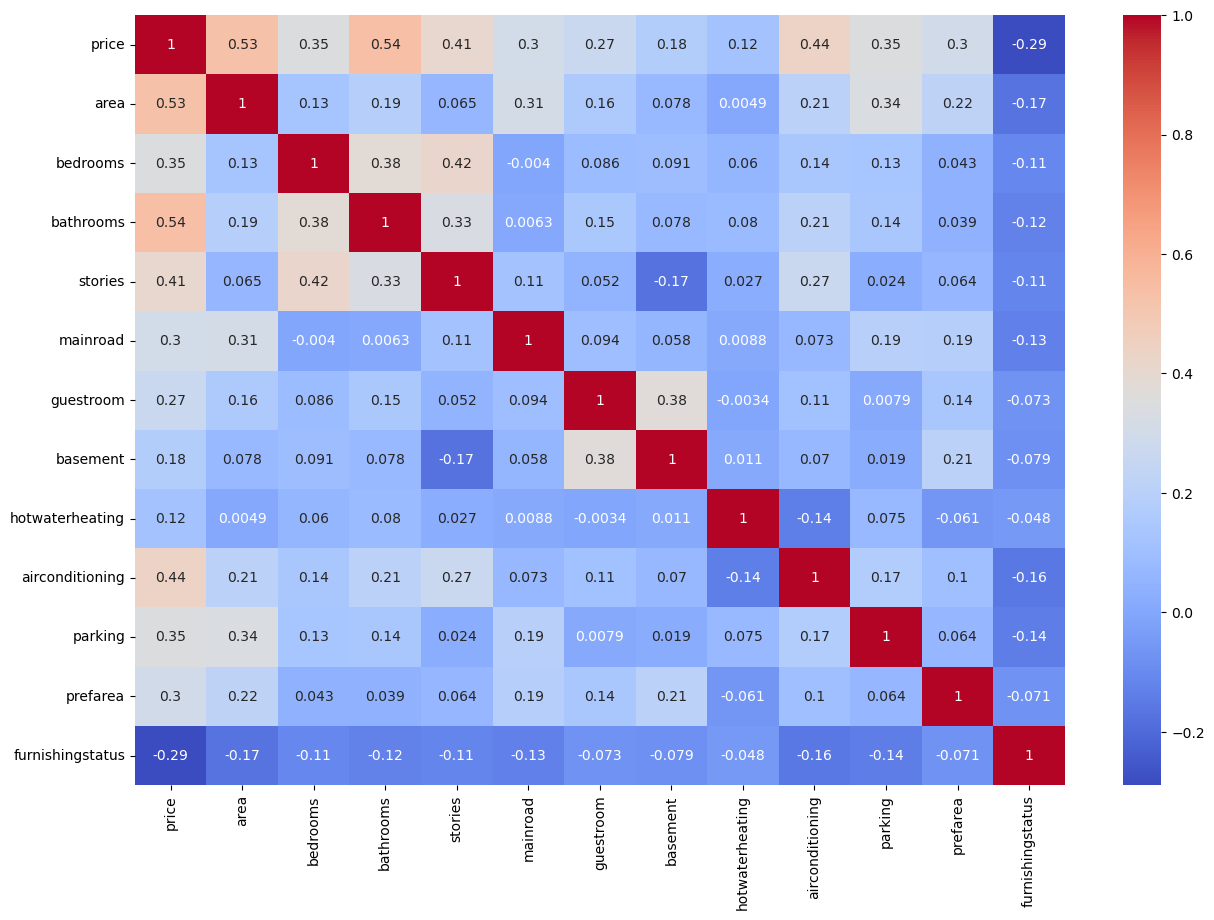

In [36]:
# checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(15,10))
sns.heatmap(train_set.corr(), annot=True, cmap= "coolwarm")

### Now splitting the train data set into X and y

In [37]:
X_train = train_set.drop("price", axis = 1)
y_train = train_set["price"]

In [43]:
# making instance of the LinearRegression model.
model = LinearRegression()

In [50]:
# fitting our model into training set
model.fit(X_train, y_train)

LinearRegression()

In [46]:
num_vars = ["area", "stories", "bathrooms", "airconditioning", "prefarea", "parking", "price"]

In [47]:
test_set[num_vars] = scaler.fit_transform(test_set[num_vars])

#### Dividing into X_test and y_test

In [48]:
y_test = test_set.pop("price")
X_test = test_set

In [49]:
model.score(X_test, y_test)

0.6262787470448472

### Now predicting the model using X_test set

In [52]:
y_preds = model.predict(X_test)

## Plotting the scatter graph

Plotting the scatter graph is very essential as it can visually represent how our model has done.

Text(0, 0.5, 'Predicted values')

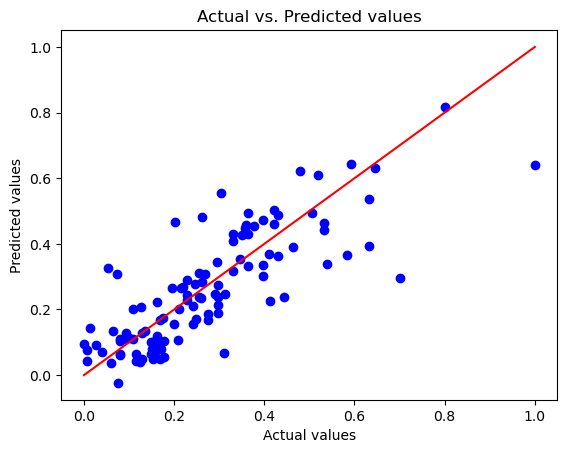

In [55]:
plt.scatter(y_test, y_preds, color = "blue", label = "Actual vs. Predicted")

# Creating the line for the perfect fit (y = x)
max_val = max(np.max(y_test), np.max(y_preds))
plt.plot([0, max_val], [0, max_val], color = "red", label = "Prefect Fit")
plt.title("Actual vs. Predicted values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
